# Custom Object Detection with Web App in Python

## 1. Objective

__STEP 1__:
- Collect data (image) relevant for object detection

- Label the image manually

__STEP 2__:
- Train YOLO V5 Model for Object Detection

- We will use __Google Colab__ to train the model

__STEP 3__:
- Create the data pipeline for getting the predictions from YOLO V5 Model.

## 2. Steps Summary

### Step-1: Data Collection and Labeling

Data preparation is very important task which effect the performance of the model. Always double check while doing:
- Data collection

- Labeling

#### Dos and Don'ts
- It's always recommended to use HD image
  - __Minimum__ width and height of the images should be at least 500 x 500
- Avoid blur images
- Avoid cluttery background images for objects
- The good labeling is when the box covers the object completely and efficiently.

#### Collect Data or Images

We always need to select or collect the data accordingly to our required object. For the general purpose:

- Objective here is to detect __20 objects__
  - Person
  - Car
  - Chair
  - Bottle
  - Sofa
  - Bicycle
  - Horse
  - Boat
  - Motor Bike
  - Cat
  - TV Monitor
  - Cow
  - Sheep
  - Aero Plane
  - Train
  - Dining Table
  - Bus
  - Potted Plant
  - Bird
  - Dog
<br>
<br>
- Always collect more data for good performance in prediction (Deep Learning: more data, better performance)

- Generally, it is good to collect __more than 500+ images__ for single object detection.
  - For example, if you want to train your model for 2 objects, then you have to collect the data for at least 1000 images.

#### Labeling

- Many tools are available to do __labeling__ to images for object detection

- List of tools:
  - Label Studio
  - Diffgram
  - LabelMe
  - LabelImg
  - VGG Image Annotator
  - LabelBox
  - Imglab
  - Semantic Segmentation Editor
  - BeaverDam
<br>
<br>
- i.e. LabelImg:

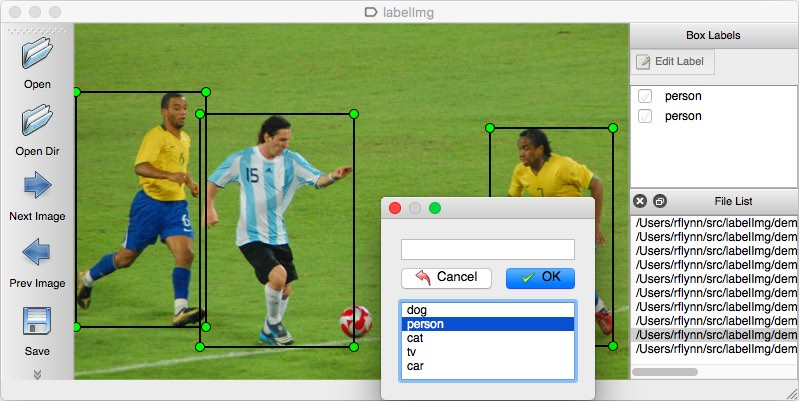

### Step-2: Train YOLOv5 Model

Ref: https://github.com/ultralytics/yolov5

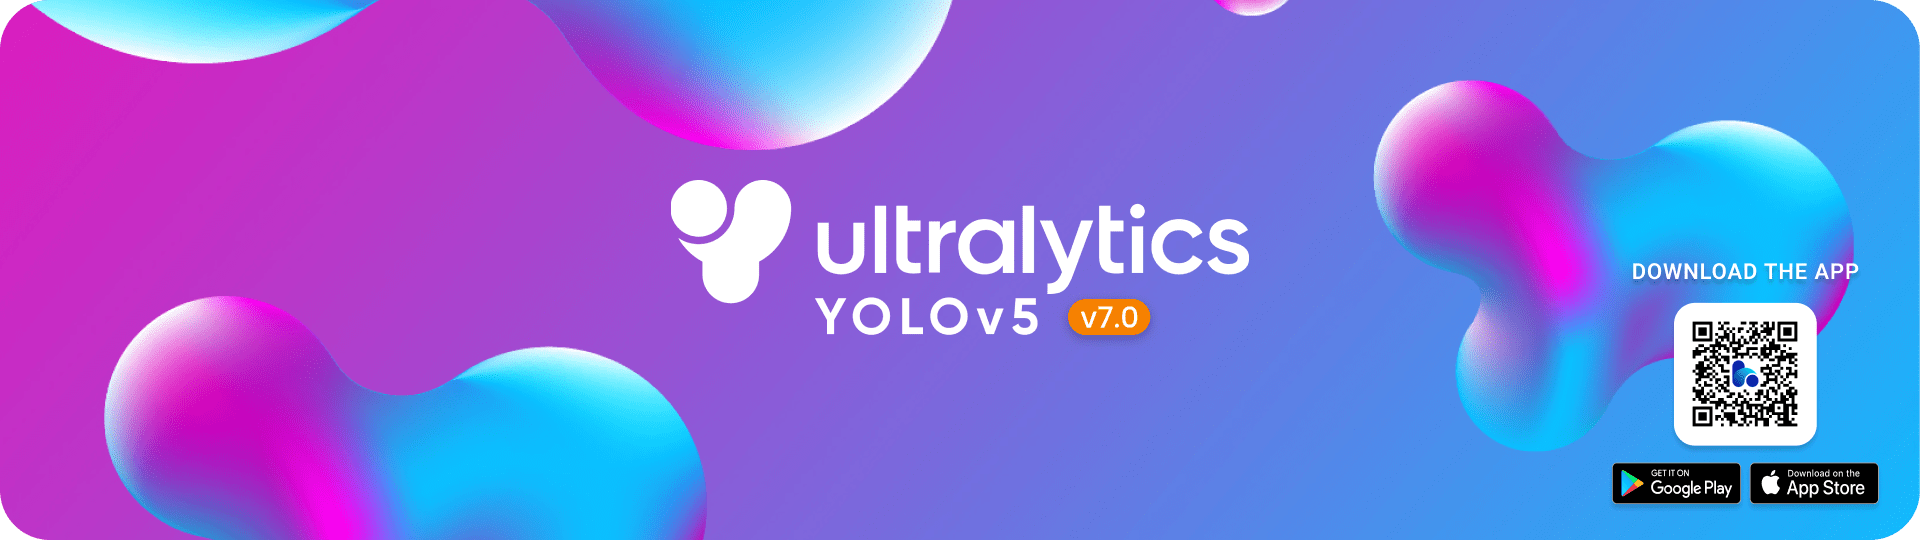

### Step-3: Get Predictions from OpenCV

- Save the YOLO in __onnx__ format.

- Load YOLO model in OpenCV and get bounding boxes.

## 3. Data Preparation
### Collect Data
- In this process, you will do manually collect and label the data, so spend time as much as possible. 
- As a reminder, for a single object detection, at least we collect 500+ images with resolution no less than 500 x 500 px. 
- To collect the hight resolution images, we can use __flickr__, __unsplash__, or [Pascal VOC dataset](http://host.robots.ox.ac.uk/pascal/VOC/)

### Labeling
- Open your terminal and activate `yolo_env` python virtual environment and run `labelImg`
  - `$ source yolo_env/bin/activate`
  - `$ labelImg`
- Click __Open Dir__ and go to images dataset folder.
  - On the bottom right corner, see if all the images have been listed in the __File List__ window.
- Adjust the application setting to `PascalVOC` on the right side bar.
- Create bounding box by clicking `Create RectBox` and give the label accordingly.
- Save the file as `.xml` file and don't rename the file, just keep it as it is.

__Note__:
- This is a completely manual process, and even small error will cost you the precision of the model.
- Make sure you accurately draw the bounding boxes of your object.

### Get List of XML files in Python

- In the XML files by labelImg, it stores the information of the image size, the name of the object(s) inside the image, along with bounding box coordinate(s) (x_min, y_min, x_max, y_max).
- For each XML file can contain multiple objects with multiple bounding boxes.
- Our task now is to extract:
  - the size of the image, 
  - the name of the file, 
  - the bounding box information (x_min, y_min, x_max, y_max), 
  - and the name of the object.

In [4]:
import os
from glob import glob
import pandas as pd
from functools import reduce
from xml.etree import ElementTree as et

In [30]:
# Load all xml files and store in a list
xml_files = glob(pathname='1_datapreparation/data_images/*.xml')

In [37]:
# Read XML files
# From each xml file we need to extract filename, size(width, height), object(name, x_min, y_min, x_max, y_max)

def extract_text(filename):
  tree = et.parse(filename)
  root = tree.getroot()
  
  # Extract file name
  img_name = root.find(path='filename').text
  # width and height of the image
  width = root.find(path='size').find(path='width').text
  height = root.find(path='size').find(path='height').text
  
  # object name and its bounding box
  parser = []
  for object in root.findall('object'):
    obj_name = object.find('name').text
    bndbox = object.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    parser.append([img_name, width, height, obj_name, xmin, xmax, ymin, ymax])

  return parser

In [38]:
parser_all = list(map(extract_text, xml_files))

In [49]:
# Change 3D to 2D list using reduce func
data = reduce(lambda x,y: x+y, parser_all)

In [53]:
# Convert the data into a dataframe
df = pd.DataFrame(data=data, columns=['filename', 'width', 'height', 'object_name', 'xmin', 'xmax', 'ymin', 'ymax'])

In [54]:
df.head()

,filename,width,height,object_name,xmin,xmax,ymin,ymax
0,007826.jpg,500,375,diningtable,80,320,217,273
1,007826.jpg,500,375,chair,197,257,193,326
2,007826.jpg,500,375,chair,139,185,184,231
3,007826.jpg,500,375,chair,258,312,180,314
4,007826.jpg,500,375,chair,10,93,195,358


In [56]:
df.shape

(15663, 8)

In [61]:
df['object_name'].value_counts()

object_name
person         5447
car            1650
chair          1427
bottle          634
pottedplant     625
bird            599
dog             538
sofa            425
bicycle         418
horse           406
boat            398
motorbike       390
cat             389
tvmonitor       367
cow             356
sheep           353
aeroplane       331
train           328
diningtable     310
bus             272
Name: count, dtype: int64